### **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import re, seaborn as sns
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing


### **Preprocesamiento de datos**

In [2]:
archivo = 'C:/Users/camil/Desktop/TESIS/Datos/Prueba/Final.xlsx'
df = pd.read_excel(archivo, sheet_name='Hoja1')
df

,Page,Imagen,Experiment,Code,Valence,Domain,Arousal
0,1,Carabineros,EX2,EX2-1,1.0,9.0,5.0
1,1,Carabineros,EX2,EX2-2,3.0,8.0,8.0
2,1,Carabineros,EX2,EX2-3,1.0,8.0,NaN
3,1,Carabineros,EX2,EX2-4,1.0,9.0,8.0
4,1,Carabineros,EX2,EX2-5,1.0,9.0,8.0
...,...,...,...,...,...,...,...
8875,10,SHOA,EX1,EX1-4,5.0,9.0,9.0
8876,10,SHOA,EX1,EX1-5,6.0,9.0,9.0
8877,10,SHOA,EX1,EX1-6,3.0,7.0,7.0
8878,10,SHOA,EX1,EX1-7,4.0,7.0,8.0


#### Exploración de datos

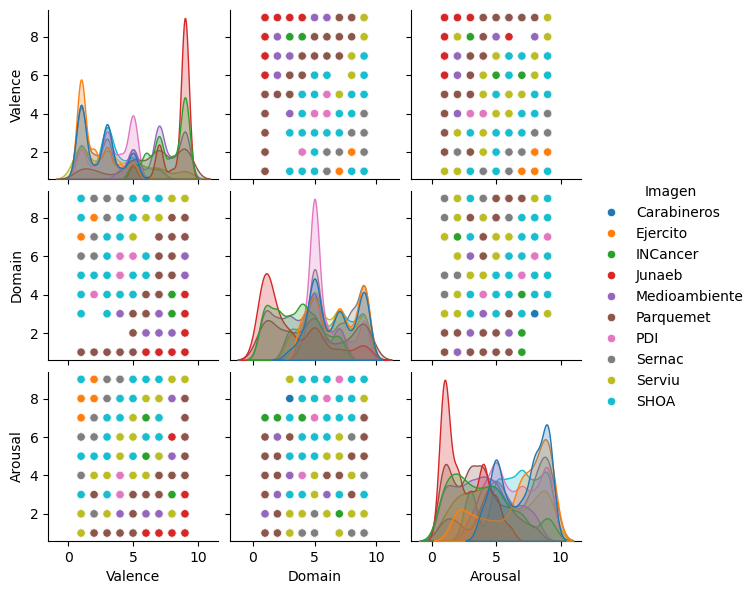

In [3]:
sns.pairplot(df.drop(['Page', 'Experiment', 'Code'], axis = 1), hue='Imagen', height=2)

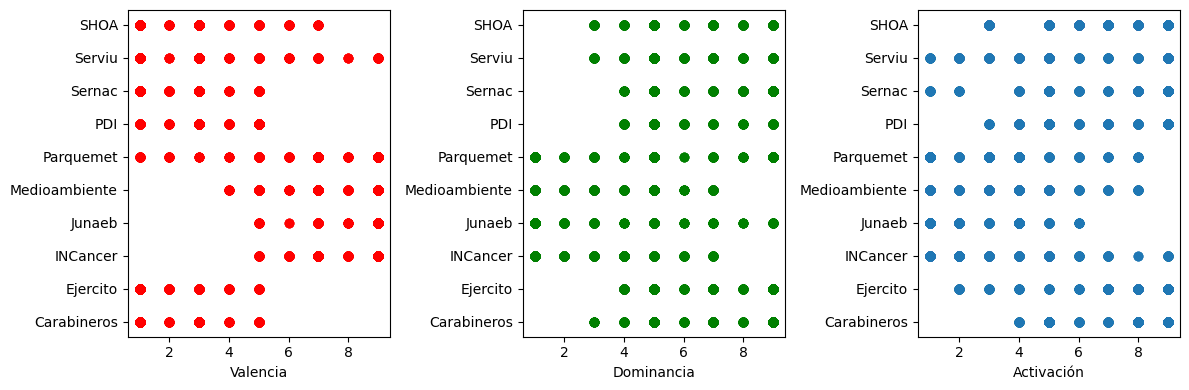

In [4]:
plt.rcParams["figure.figsize"] = (12,4)
plt.subplot(1,3,1)
var1 = 'Valence'
data1 = pd.concat([df['Imagen'], df[var1]], axis=1)
plt.scatter(x=data1[var1], y=data1['Imagen'], alpha = 0.5, c='r');
plt.xlabel('Valencia')

plt.subplot(1,3,2)
var2 = 'Domain'
data2 = pd.concat([df['Imagen'], df[var2]], axis=1)
plt.scatter(x=data2[var2], y=data2['Imagen'], alpha = 0.5, c='g');
plt.xlabel('Dominancia')

plt.subplot(1,3,3)
var3 = 'Arousal'
data3 = pd.concat([df['Imagen'], df[var3]], axis=1)
plt.scatter(x=data3[var3], y=data3['Imagen'], alpha = 0.5);
plt.xlabel('Activación')

plt.tight_layout()

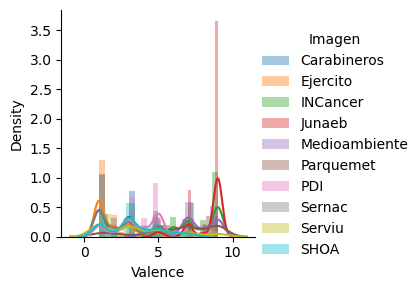

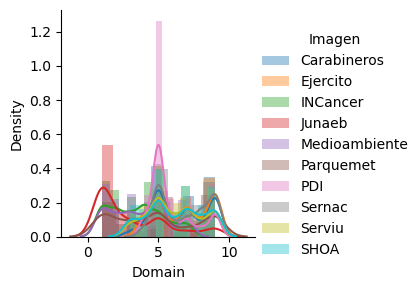

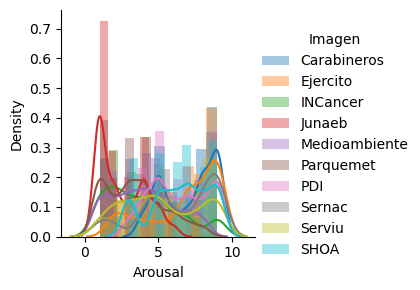

In [5]:
import warnings
warnings.filterwarnings('ignore')
plot = sns.FacetGrid(df, hue="Imagen")
plot.map(sns.distplot, "Valence").add_legend()
plot = sns.FacetGrid(df, hue="Imagen")
plot.map(sns.distplot, "Domain").add_legend()
plot = sns.FacetGrid(df, hue="Imagen")
plot.map(sns.distplot, "Arousal").add_legend()

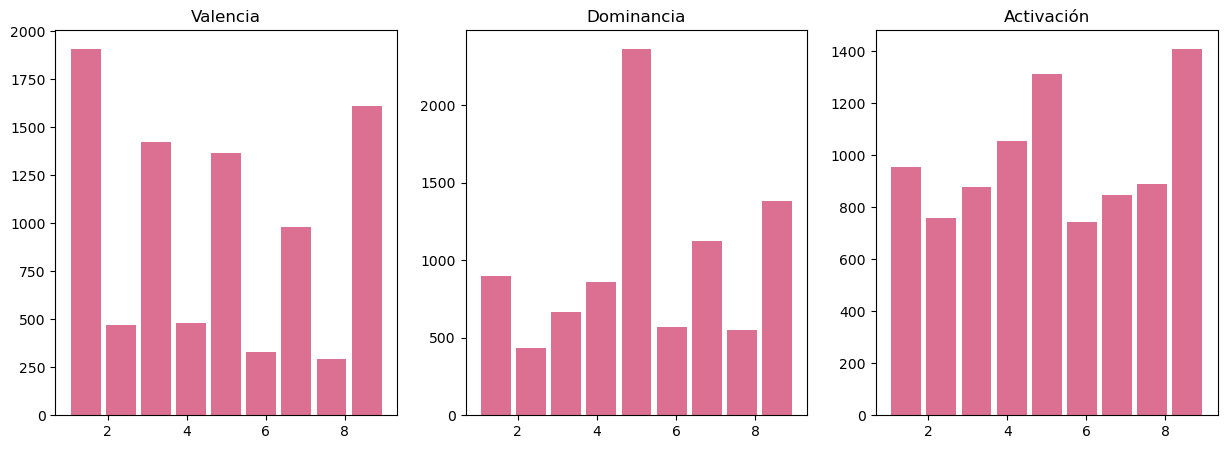

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].set_title("Valencia")
axes[0].hist(df['Valence'], bins=9, color='palevioletred', rwidth=0.85)
axes[1].set_title("Dominancia")
axes[1].hist(df['Domain'], bins=9,color='palevioletred', rwidth=0.85);
axes[2].set_title("Activación")
axes[2].hist(df['Arousal'], bins=9, color='palevioletred', rwidth=0.85);

In [7]:
stat1, p1 = normaltest(df['Valence'])
stat2, p2 = normaltest(df['Domain'])
stat3, p3 = normaltest(df['Arousal'])
# Test de Diagnostico Valencia 
print('VALENCIA:', 'Estadisticos=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05: print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else: print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')
# Test de Diagnostico Valencia 
print('DOMINANCIA', 'Estadisticos=%.3f, p=%.3f' % (stat2, p2))
if p2 > 0.05: print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else: print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')
# Test de Diagnostico Valencia 
print('Activación', 'Estadisticos=%.3f, p=%.3f' % (stat3, p3))
if p3 > 0.05: print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else: print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

VALENCIA: Estadisticos=nan, p=nan
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
DOMINANCIA Estadisticos=nan, p=nan
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Activación Estadisticos=nan, p=nan
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


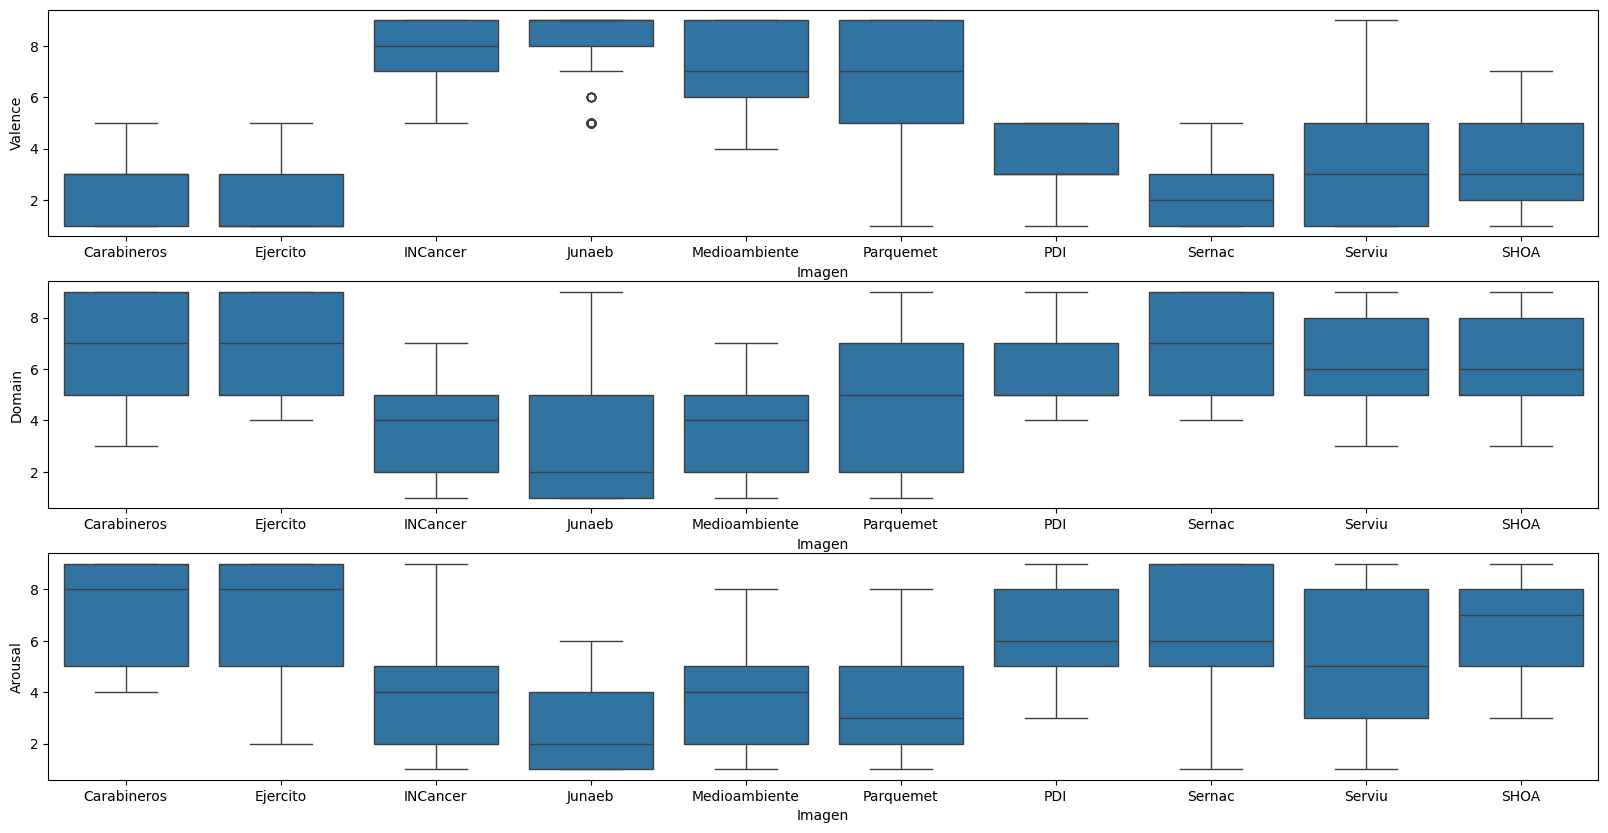

In [8]:
def graph(y):
    sns.boxplot(x="Imagen", y=y, data=df)
 
plt.figure(figsize=(20,10))
plt.subplot(311)
graph('Valence')
plt.subplot(312)
graph('Domain')
plt.subplot(313)
graph('Arousal')
plt.show()

#### Análisis de datos

In [9]:
df.describe()

,Page,Valence,Domain,Arousal
count,8880.000000,8862.000000,8847.000000,8854.000000
mean,5.500000,4.688671,5.330734,5.206122
std,2.872443,2.865570,2.447649,2.626164
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,4.000000,3.000000
50%,5.500000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,8.000000
max,10.000000,9.000000,9.000000,9.000000


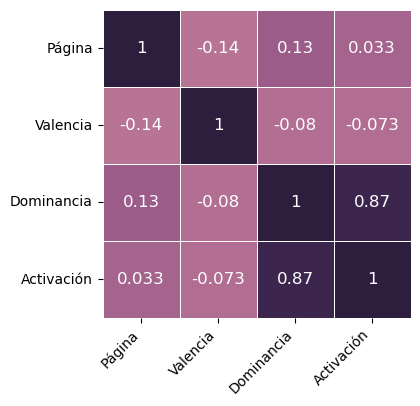

In [10]:
corr_matrix = df.corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.heatmap(corr_matrix, annot = True, cbar = False, annot_kws = {"size": 12},vmin = -1, vmax = 1, center = 0, cmap = sns.cubehelix_palette(as_cmap=True),
    square = True,ax = ax,
            xticklabels=['Página','Valencia','Dominancia','Activación'],
            yticklabels=['Página','Valencia','Dominancia','Activación'], linewidths=0.7,linecolor="white")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right')
ax.tick_params(labelsize = 10)
plt.rcParams["figure.figsize"]=(12,5)

#### Limpieza de datos

In [11]:
#Datos perdidos:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Domain,33,0.003716
Arousal,26,0.002928
Valence,18,0.002027
Page,0,0.000000
Imagen,0,0.000000
Experiment,0,0.000000
Code,0,0.000000


In [12]:
df = df.drop(df.loc[df['Valence'].isnull()].index)
df = df.drop(df.loc[df['Arousal'].isnull()].index)
df = df.drop(df.loc[df['Domain'].isnull()].index)
df.isnull().sum().max()

0

In [13]:
print(f"Los datos duplicados son en total {df.duplicated().sum()}")
print(f"Los datos duplicados son {df.duplicated}")
df.drop_duplicates()

Los datos duplicados son en total 0
Los datos duplicados son <bound method DataFrame.duplicated of       Page       Imagen Experiment   Code  Valence  Domain  Arousal
0        1  Carabineros        EX2  EX2-1      1.0     9.0      5.0
1        1  Carabineros        EX2  EX2-2      3.0     8.0      8.0
3        1  Carabineros        EX2  EX2-4      1.0     9.0      8.0
4        1  Carabineros        EX2  EX2-5      1.0     9.0      8.0
5        1  Carabineros        EX2  EX2-6      5.0     5.0      5.0
...    ...          ...        ...    ...      ...     ...      ...
8875    10         SHOA        EX1  EX1-4      5.0     9.0      9.0
8876    10         SHOA        EX1  EX1-5      6.0     9.0      9.0
8877    10         SHOA        EX1  EX1-6      3.0     7.0      7.0
8878    10         SHOA        EX1  EX1-7      4.0     7.0      8.0
8879    10         SHOA        EX1  EX1-8      6.0     9.0      9.0

[8809 rows x 7 columns]>


,Page,Imagen,Experiment,Code,Valence,Domain,Arousal
0,1,Carabineros,EX2,EX2-1,1.0,9.0,5.0
1,1,Carabineros,EX2,EX2-2,3.0,8.0,8.0
3,1,Carabineros,EX2,EX2-4,1.0,9.0,8.0
4,1,Carabineros,EX2,EX2-5,1.0,9.0,8.0
5,1,Carabineros,EX2,EX2-6,5.0,5.0,5.0
...,...,...,...,...,...,...,...
8875,10,SHOA,EX1,EX1-4,5.0,9.0,9.0
8876,10,SHOA,EX1,EX1-5,6.0,9.0,9.0
8877,10,SHOA,EX1,EX1-6,3.0,7.0,7.0
8878,10,SHOA,EX1,EX1-7,4.0,7.0,8.0


In [14]:
#Eliminación de columnas irrelevantes
df.drop('Experiment', axis = 'columns', inplace = True)
df.drop('Imagen', axis = 'columns', inplace = True)
df.drop('Code', axis = 'columns', inplace = True)

#### Transformación de datos

In [15]:
df['Domain'] = df['Domain'].astype('int64')
df['Arousal'] = df['Arousal'].astype('int64')
df['Valence'] = df['Valence'].astype('int64')
print(df.dtypes)
df

Page       int64
Valence    int64
Domain     int64
Arousal    int64
dtype: object


,Page,Valence,Domain,Arousal
0,1,1,9,5
1,1,3,8,8
3,1,1,9,8
4,1,1,9,8
5,1,5,5,5
...,...,...,...,...
8875,10,5,9,9
8876,10,6,9,9
8877,10,3,7,7
8878,10,4,7,8


In [16]:
scaler = preprocessing.MinMaxScaler()
X = df.drop('Page', axis=1)
names = X.columns
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Valence,Domain,Arousal
0,0.00,1.000,0.500
1,0.25,0.875,0.875
2,0.00,1.000,0.875
3,0.00,1.000,0.875
4,0.50,0.500,0.500


#### **Entrenamiento del modelo**

In [17]:
X = scaled_df
Y = df['Page']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0, stratify= Y)
X_train

,Valence,Domain,Arousal
3810,1.000,0.000,0.000
3437,1.000,0.750,0.500
5702,0.375,0.500,0.750
7388,0.000,0.375,0.125
2021,0.500,1.000,1.000
...,...,...,...
3283,1.000,0.500,0.375
4307,0.875,0.500,0.500
3825,0.625,0.000,0.000
7030,0.000,0.500,0.375


### **Regresión Logistica Multinomial**

In [18]:
modelo = LogisticRegression(C=10, penalty= 'l2',solver = "saga", multi_class = "multinomial", max_iter=5000)
modelo = modelo.fit(X_train,Y_train)
Y_pred = modelo.predict(X_test)
modelo

LogisticRegression(C=10, max_iter=5000, multi_class='multinomial',
                   solver='saga')

In [19]:
print(f"El modelo tiene una precisión del {round(precision_score(Y_test, Y_pred, average='weighted')*100,2)}%")
print(f"El modelo tiene un accuracy del {round(accuracy_score(Y_pred,Y_test)*100,2)}%")
print(f"El modelo tiene un f1 de {round(f1_score(Y_test, Y_pred, average='weighted')*100,2)}%")

El modelo tiene una precisión del 57.01%
El modelo tiene un accuracy del 56.0%
El modelo tiene un f1 de 55.69%


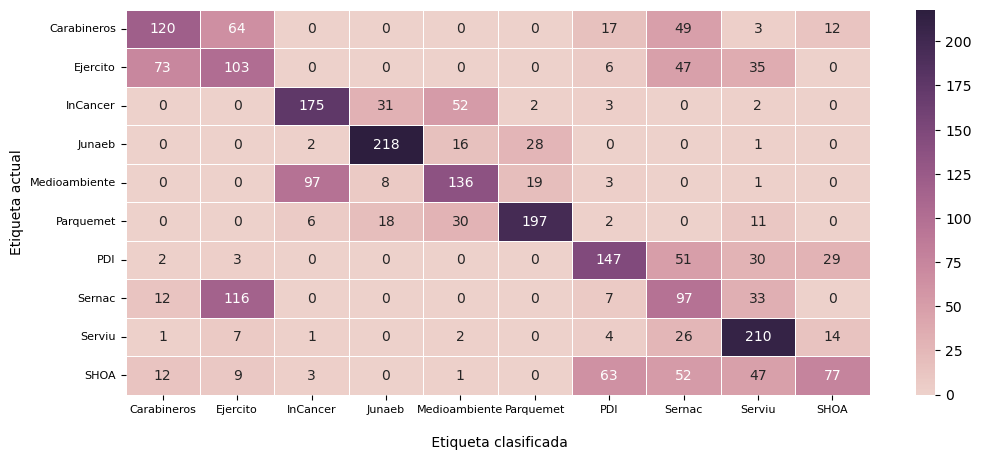

In [20]:
cfm = confusion_matrix(Y_test, Y_pred)
ax = sns.heatmap(cfm, annot=True, fmt="", linewidths=0.7,linecolor="white",
            annot_kws = {'size': 10},cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels=['Carabineros','Ejercito','InCancer','Junaeb','Medioambiente','Parquemet','PDI','Sernac','Serviu','SHOA'],
            yticklabels=['Carabineros','Ejercito','InCancer','Junaeb','Medioambiente','Parquemet','PDI','Sernac','Serviu','SHOA'],)
font = {'family': 'arial','color':  'black','weight': 'normal','size': 13,}
ax.set_xlabel('\n Etiqueta clasificada')
ax.set_ylabel('Etiqueta actual')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.xticks(rotation=0)
plt.rcParams["figure.figsize"]=(12,5)

In [21]:
from sklearn.metrics import classification_report
Resultados = classification_report(Y_test, Y_pred)
print(Resultados)

              precision    recall  f1-score   support

           1       0.55      0.45      0.49       265
           2       0.34      0.39      0.36       264
           3       0.62      0.66      0.64       265
           4       0.79      0.82      0.81       265
           5       0.57      0.52      0.54       264
           6       0.80      0.75      0.77       264
           7       0.58      0.56      0.57       262
           8       0.30      0.37      0.33       265
           9       0.56      0.79      0.66       265
          10       0.58      0.29      0.39       264

    accuracy                           0.56      2643
   macro avg       0.57      0.56      0.56      2643
weighted avg       0.57      0.56      0.56      2643

